In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from tabulate import tabulate

In [2]:
raw_data = pd.read_csv('1.03.+Dummies.csv')

In [3]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
df = raw_data.copy()

In [5]:
df['Attendance'] = df['Attendance'].map({'Yes':1, 'No':0})

In [6]:
df

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [7]:
df.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [8]:
y = df['GPA']
x1 = df[['SAT', 'Attendance']]

In [9]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
summary = results.summary()

for i in range(len(summary.tables)):
    print(tabulate(summary.tables[i],tablefmt='fancy_grid'))

#R-squared: 56.5% of the variability of GPA can be explained by SAT and Attendance

#Adjusted R-squared: 55.5% of the variability in GPA is explained by the independent variables included in the regression model, while accounting for the number of predictors and the sample size

#GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendance

╒═══════════════════╤══════════════════╤═════════════════════╤══════════╕
│ Dep. Variable:    │ GPA              │ R-squared:          │ 0.565    │
├───────────────────┼──────────────────┼─────────────────────┼──────────┤
│ Model:            │ OLS              │ Adj. R-squared:     │ 0.555    │
├───────────────────┼──────────────────┼─────────────────────┼──────────┤
│ Method:           │ Least Squares    │ F-statistic:        │ 52.70    │
├───────────────────┼──────────────────┼─────────────────────┼──────────┤
│ Date:             │ Wed, 05 Jun 2024 │ Prob (F-statistic): │ 2.19e-15 │
├───────────────────┼──────────────────┼─────────────────────┼──────────┤
│ Time:             │ 09:21:47         │ Log-Likelihood:     │ 25.798   │
├───────────────────┼──────────────────┼─────────────────────┼──────────┤
│ No. Observations: │ 84               │ AIC:                │ -45.60   │
├───────────────────┼──────────────────┼─────────────────────┼──────────┤
│ Df Residuals:     │ 81              

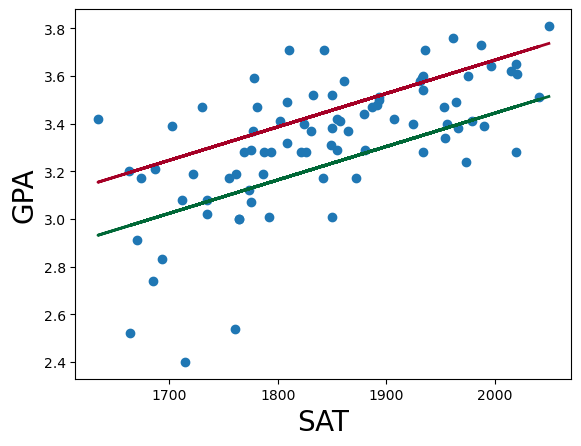

In [10]:
plt.scatter(df['SAT'], y)

yhat_no = 0.6439 + 0.0014 * df['SAT']
yhat_yes = 0.8665 + 0.0014 * df['SAT']
fig = plt.plot( df['SAT'], yhat_no, lw = 2, c= "#006837")
fig = plt.plot( df['SAT'], yhat_yes, lw = 2, c= "#a50026")

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [11]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [13]:
new_df = pd.DataFrame({'const':1, 'SAT': [1700,1670], 'Attendance': [0,1]})
new_df = new_df[['const', 'SAT', 'Attendance']]
new_df

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [16]:
new_df.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [18]:
predictions = results.predict(new_df)
predictions

0    3.023513
1    3.204163
dtype: float64

In [19]:
predictionsdf = pd.DataFrame({'Predictions': predictions})
joined = new_df.join(predictionsdf)
joined.rename(index ={0:'Bob', 1: 'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
